In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

2021-10-05 06:45:39.243112: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', y_train.shape, ' , t_test.shape = ', y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


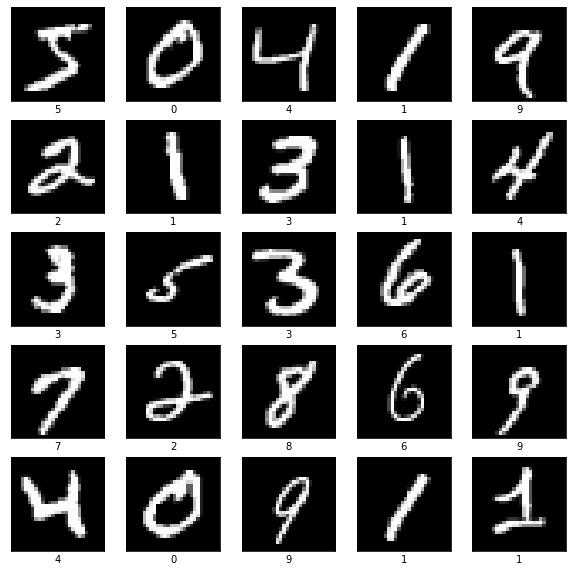

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))

plt.show()

In [13]:
# functional model construction

input_ = Input(shape=(28,28,1))

x1 = Conv2D(kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='SAME')(input_)
x2 = MaxPooling2D(pool_size=(2,2), padding='SAME')(x1)
x3 = Dropout(0.25)(x2)

x4 = Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='SAME')(x3)
x5 = MaxPooling2D(pool_size=(2,2), padding='SAME')(x4)
x6 = Dropout(0.25)(x5)

x7 = Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu', padding='SAME')(x6)
x8 = MaxPooling2D(pool_size=(2,2), padding='SAME')(x7)
x9 = Dropout(0.25)(x8)

x10 = Flatten()(x9)

output_ = Dense(10, activation='softmax')(x10)


model = Model(inputs=input_, outputs=output_)

In [14]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0   

In [16]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = input_2, (None, 28, 28, 1)
model.layers[1] = conv2d_3, (None, 28, 28, 32)
model.layers[2] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[3] = dropout_3, (None, 14, 14, 32)
model.layers[4] = conv2d_4, (None, 14, 14, 64)
model.layers[5] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[6] = dropout_4, (None, 7, 7, 64)
model.layers[7] = conv2d_5, (None, 7, 7, 128)
model.layers[8] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[9] = dropout_5, (None, 4, 4, 128)
model.layers[10] = flatten_1, (None, 2048)
model.layers[11] = dense_1, (None, 10)


In [17]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

## 학습전 특징맵 (feature map) 시각화

In [18]:
for layer in model.layers:

    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d_3 (None, 28, 28, 32)
conv2d_4 (None, 14, 14, 64)
conv2d_5 (None, 7, 7, 128)


In [19]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = input_2, (None, 28, 28, 1)
model.layers[1] = conv2d_3, (None, 28, 28, 32)
model.layers[2] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[3] = dropout_3, (None, 14, 14, 32)
model.layers[4] = conv2d_4, (None, 14, 14, 64)
model.layers[5] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[6] = dropout_4, (None, 7, 7, 64)
model.layers[7] = conv2d_5, (None, 7, 7, 128)
model.layers[8] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[9] = dropout_5, (None, 4, 4, 128)
model.layers[10] = flatten_1, (None, 2048)
model.layers[11] = dense_1, (None, 10)


In [20]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 x1 층만 떼어냄

partial_model = Model(inputs=input_, outputs=x1) 

partial_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


8018


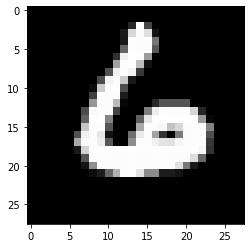

In [21]:
random_idx = np.random.randint(0, len(x_test))

print(random_idx)

plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray') 

In [22]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map.shape)

fm = feature_map[0]  # 0번 이미지의 특징 맵을 시각화

print(fm.shape)

2021-10-05 07:00:51.998451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-05 07:00:52.030669: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz
2021-10-05 07:00:52.122229: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-05 07:00:54.274138: I tensorflow/stream_executor/cuda/cuda_dnn.cc:380] Loaded cuDNN version 8202
2021-10-05 07:00:57.740415: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-05 07:00:59.455484: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


(1, 28, 28, 32)
(28, 28, 32)


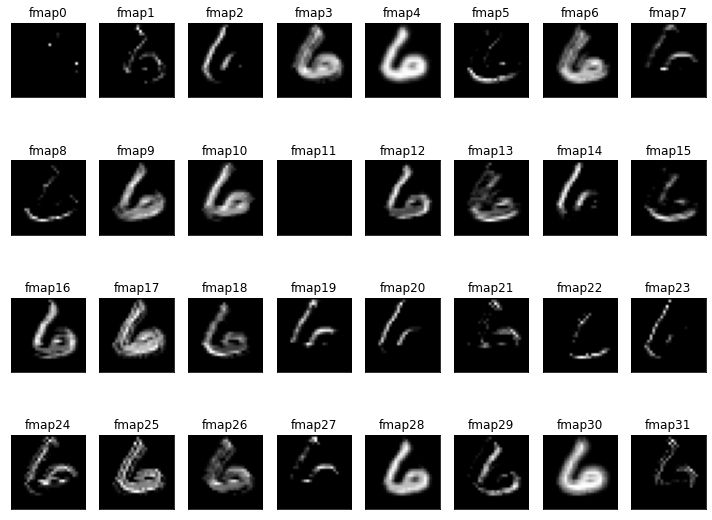

In [23]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

## 학습전 풀링맵 (pooling map) 시각화

In [24]:
# 첫번째 층, 즉 x2 층만 떼어냄

partial_model = Model(inputs=input_, outputs=x2) 

partial_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [25]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map.shape)

pm = pooling_map[0]  # 0번 이미지의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


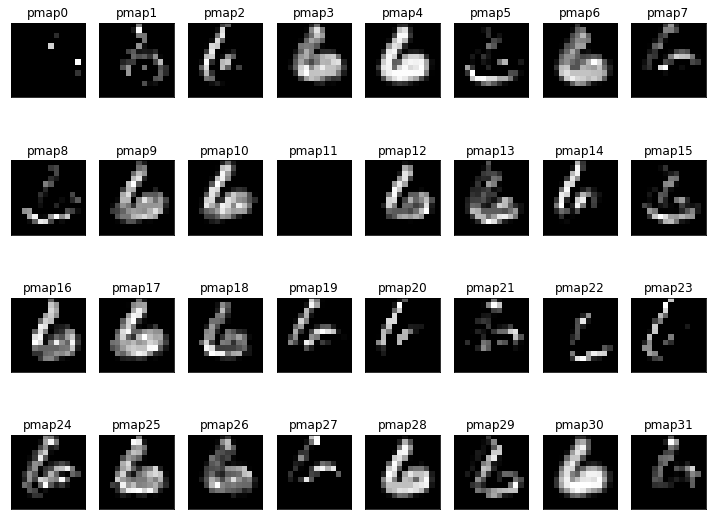

In [26]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')  # 14 x 14 x 32

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()

## 모델 학습

In [27]:
start_time = datetime.now()

hist = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
938/938 [==============================] - 64s 54ms/step - loss: 0.2166 - accuracy: 0.9310 - val_loss: 0.0466 - val_accuracy: 0.9850
Epoch 2/50
938/938 [==============================] - 22s 23ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 3/50
938/938 [==============================] - 14s 15ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/50
938/938 [==============================] - 14s 15ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0229 - val_accuracy: 0.9931
Epoch 5/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0194 - val_accuracy: 0.9924
Epoch 6/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0201 - val_accuracy: 0.9932
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0225 - val_accuracy: 

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0243 - accuracy: 0.9944


[0.02432914637029171, 0.9944000244140625]

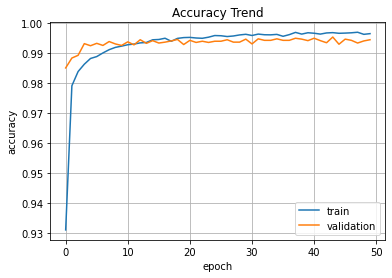

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

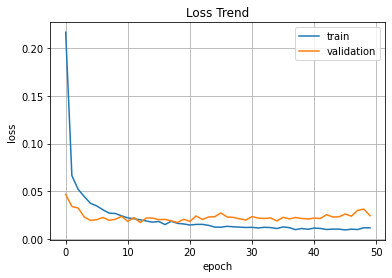

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

## 학습 후 특징맵 (feature map) 시각화

In [31]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = input_2, (None, 28, 28, 1)
model.layers[1] = conv2d_3, (None, 28, 28, 32)
model.layers[2] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[3] = dropout_3, (None, 14, 14, 32)
model.layers[4] = conv2d_4, (None, 14, 14, 64)
model.layers[5] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[6] = dropout_4, (None, 7, 7, 64)
model.layers[7] = conv2d_5, (None, 7, 7, 128)
model.layers[8] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[9] = dropout_5, (None, 4, 4, 128)
model.layers[10] = flatten_1, (None, 2048)
model.layers[11] = dense_1, (None, 10)


In [33]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 x1 층만 떼어냄

partial_model=Model(inputs=input_, outputs=x1) 

partial_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [34]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map.shape)

fm = feature_map[0]  # 0번 영상의 특징 맵을 시각화

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


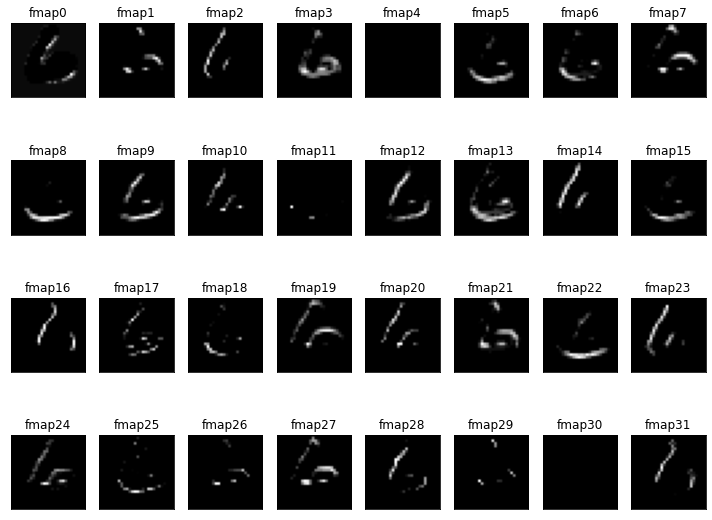

In [35]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

## 학습 후 풀링맵 (pooling map) 시각화

In [36]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = input_2, (None, 28, 28, 1)
model.layers[1] = conv2d_3, (None, 28, 28, 32)
model.layers[2] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[3] = dropout_3, (None, 14, 14, 32)
model.layers[4] = conv2d_4, (None, 14, 14, 64)
model.layers[5] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[6] = dropout_4, (None, 7, 7, 64)
model.layers[7] = conv2d_5, (None, 7, 7, 128)
model.layers[8] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[9] = dropout_5, (None, 4, 4, 128)
model.layers[10] = flatten_1, (None, 2048)
model.layers[11] = dense_1, (None, 10)


In [37]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model=Model(inputs=input_, outputs=x2) 

partial_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [38]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map.shape)

pm = pooling_map[0]  # 0번 영상의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


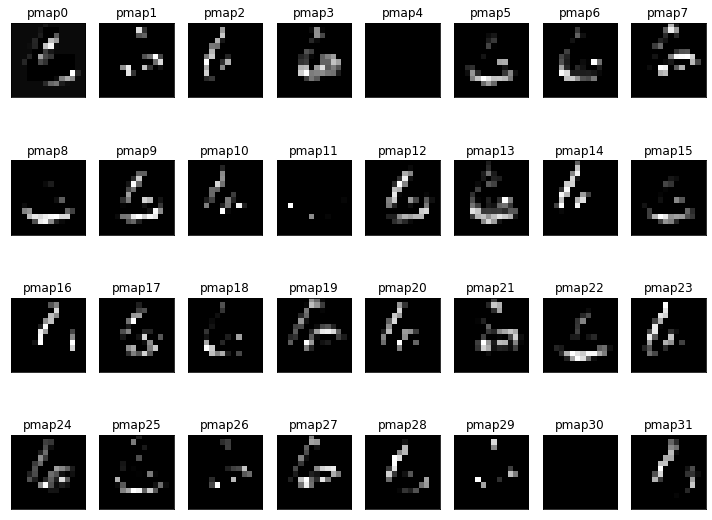

In [39]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()